![title](./pics/dd_logo.png) 


# More on Parsing

In our first example, we parsed a page and looked at the individual components that were returned as a result of the parsing. Now, we will turn to another example and demonstrate what other kinds of results can also be displayed.

In [1]:
import deepdoctection as dd
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

We begin by instantiating the analyzer, which we configure slightly differently from the default settings. 

In [ ]:
analyzer = dd.get_dd_analyzer(config_overwrite=['USE_LAYOUT_LINK=True'])

Let's choose a machine learning research paper taken from arXiv. 

In [3]:
pdf_path = Path.cwd() / "sample/2312.13560.pdf"
df = analyzer.analyze(path=pdf_path)
df.reset_state() 

In [ ]:
doc=iter(df)
pages = list(doc) # will process the whole document

You may notice that some `line`s are labeled with the category `line`. This layout section is artificial and generated by the `analyzer`. Every word recognized by the OCR must be assigned to a layout section. If this is not possible for certain `word`s, they are grouped together and merged into a `line`.

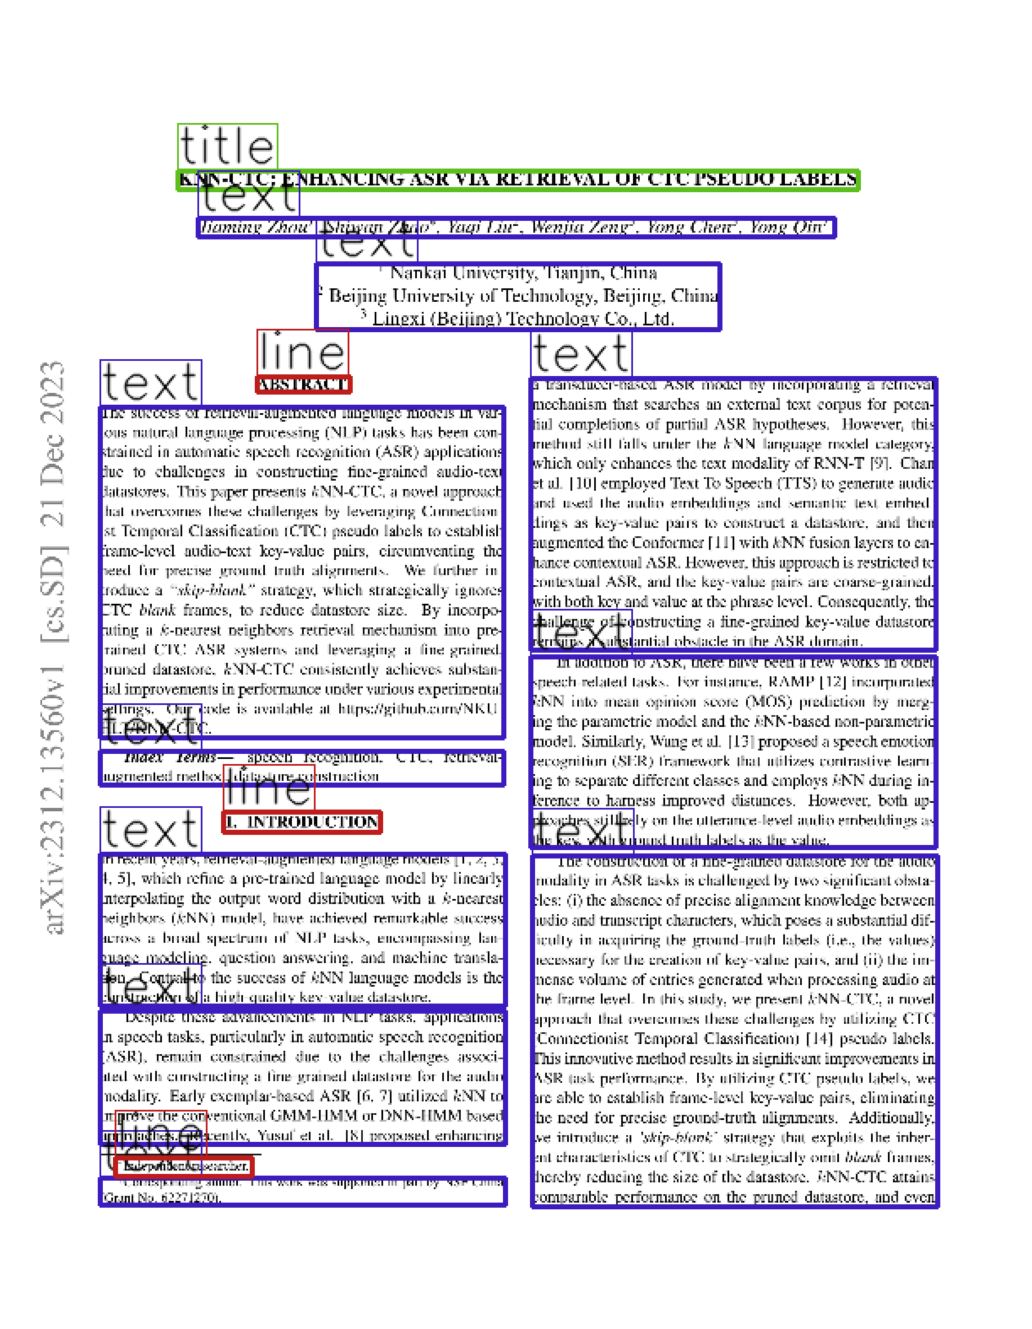

In [5]:
page = pages[0]

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz())

In [6]:
for layout in page.layouts: 
    print(f"category_name: {layout.category_name.value}, annotation_id: {layout.annotation_id}")

category_name: text, annotation_id: 97249a29-92ce-3fbf-afee-bef7b0da7b4b
category_name: text, annotation_id: c063f031-470c-3241-81d5-e15acc2b2a5e
category_name: text, annotation_id: 13c0758b-09da-385a-b747-995f65944a92
category_name: text, annotation_id: 98ed83dc-379b-3ca5-8007-a02893c4bae8
category_name: text, annotation_id: 8dfe9280-55d2-3d12-9c05-5a2f39505b1e
category_name: text, annotation_id: f30d36ab-8ce5-3c79-b6f6-cfcbb726b0f7
category_name: text, annotation_id: 6ff94814-af5b-3c87-9f9e-6566314be222
category_name: title, annotation_id: 36d4e7dc-e8f4-3a92-a04e-4bdcbbc59893
category_name: text, annotation_id: 59a9782b-3906-3b80-87ae-18abccced5d8
category_name: text, annotation_id: d0789a1e-2458-3654-8cc8-7cd7462e09c0
category_name: text, annotation_id: 396c4077-4369-351b-83f7-0e05c15cc8f1
category_name: line, annotation_id: 4e5ab140-f897-36af-8161-5a8b82a79c65
category_name: line, annotation_id: c8d799b2-8cd8-3a84-87f7-ab01e288b765
category_name: line, annotation_id: 5dd9b29c-2a28-

The watermark on the left is also noticeable — it is not displayed. However, there are certain layout segments that do not belong to the main body text. These include elements such as tables, as shown in the first notebook. Additionally, there are residual_layouts like `page_header` and `page_footer`. These special layout sections can be displayed if needed.

In [7]:
[layout.category_name.value for layout in page.residual_layouts]

['page_header', 'page_footer']

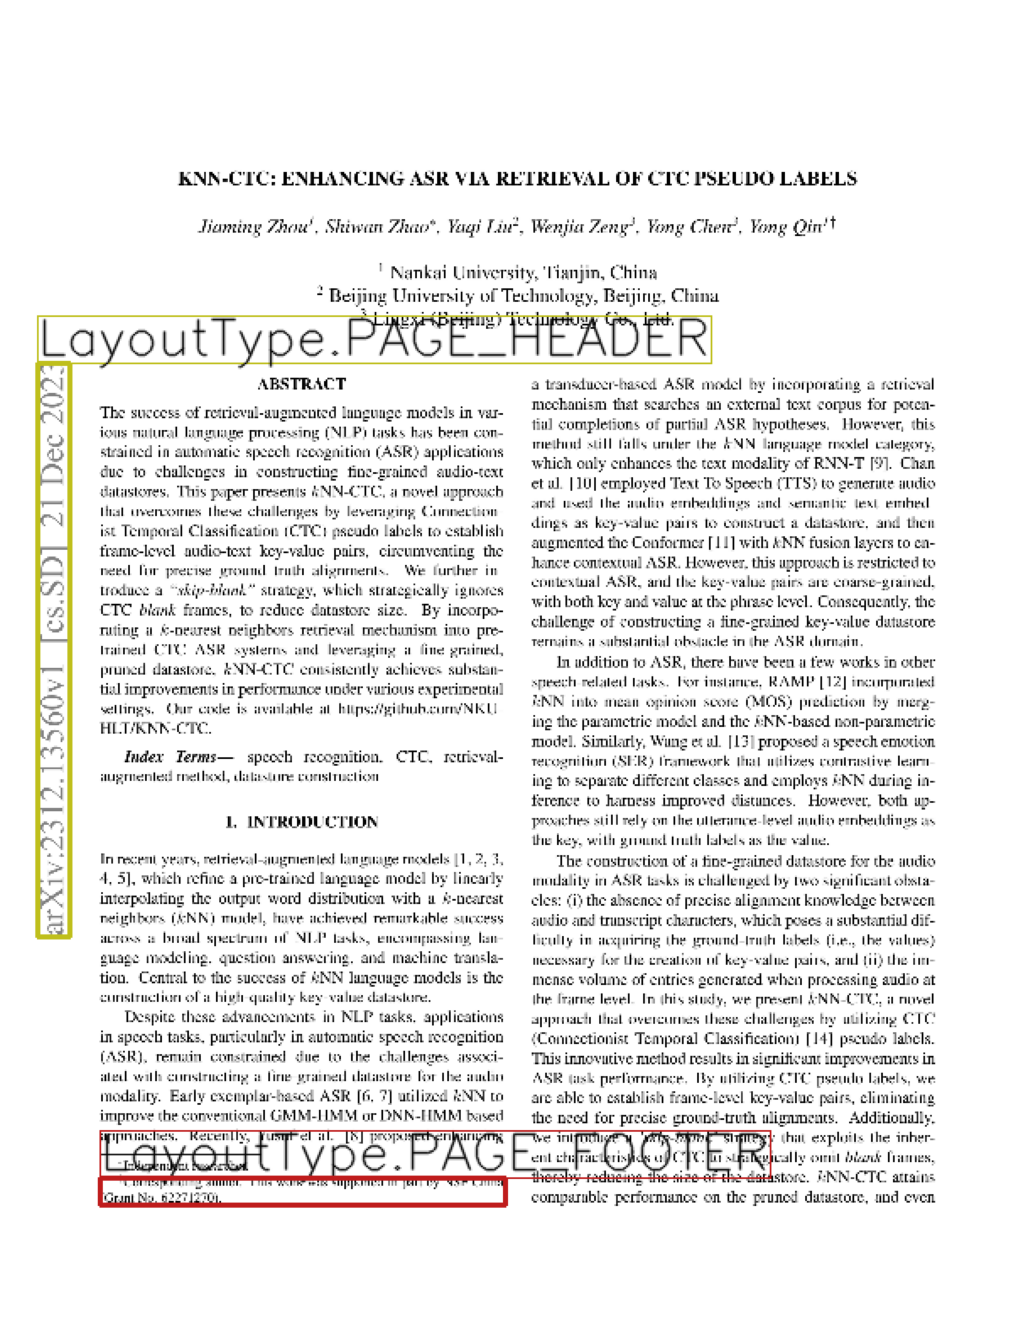

In [8]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(page_header="category_name", page_footer="category_name")) # pass the layout section`s 
# category_name as argument. It`s value is the value we want to display, in this case it`s category_name. 
# You can also display other attributes, e.g. annotation_id.

The **deep**doctection reading order algorithm is rule-based but can handle various layout types, such as multi-column layouts. However, there are also page layouts where determining the correct reading order fails.

In [9]:
print(page.text)

KNN-CTC: ENHANCING ASR VIA RETRIEVAL OF CTC PSEUDOLABELS
Jiaming Zhou', Shiwan Zhao*, Yaqi Liu, Wenjia Zeng', Yong Chen', Yong Qin't
Nankai University, Tianjin, China 21 Beijing University of Technology, Beijing, China 31 Lingxi (Beijing) Technology Co.,Ltd.
ABSTRACT
The success of retrieval-augmented language models in var- ious natural language processing (NLP) tasks has been con- strained in automatic speech recognition (ASR) applications due to challenges in constructing fine-grained audio-text datastores. This paper presents KNN-CTC, a novel approach that overcomes these challenges by leveraging Connection- ist Temporal Classification (CTC) pseudo labels to establish frame-level audio-text key-value pairs, circumventing the need for precise ground truth alignments. We further in- troduce a "skip-blank" strategy, which strategically ignores CTC blank frames, to reduce datastore size. By incorpo- rating a k-nearest neighbors retrieval mechanism into pre- trained CTC ASR systems and 

We can detect figures...

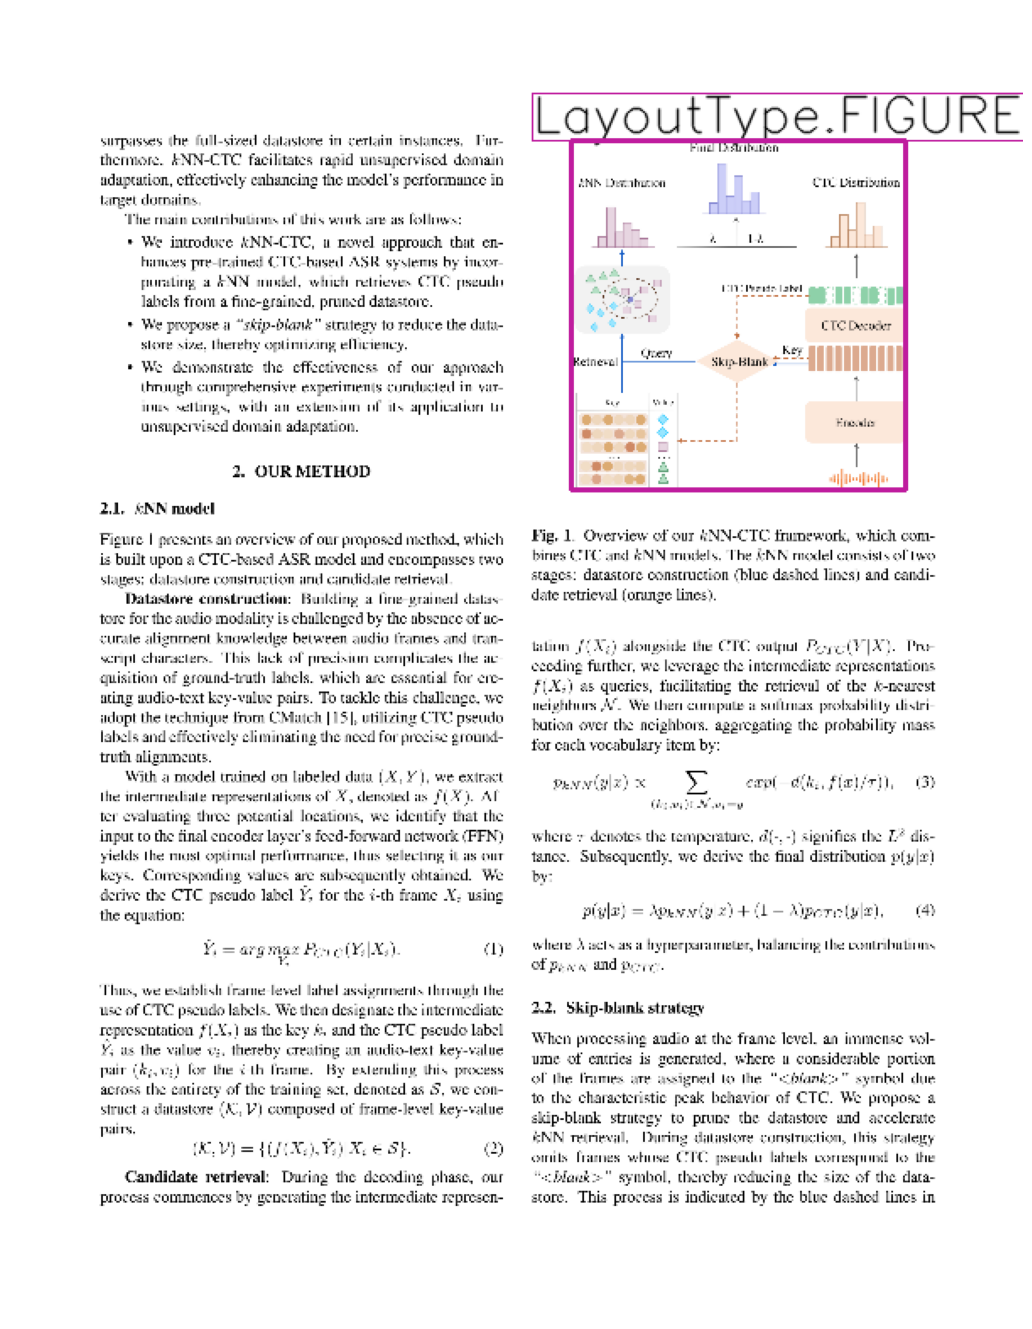

In [10]:
page = pages[1]
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(figure="category_name"))

... and captions.

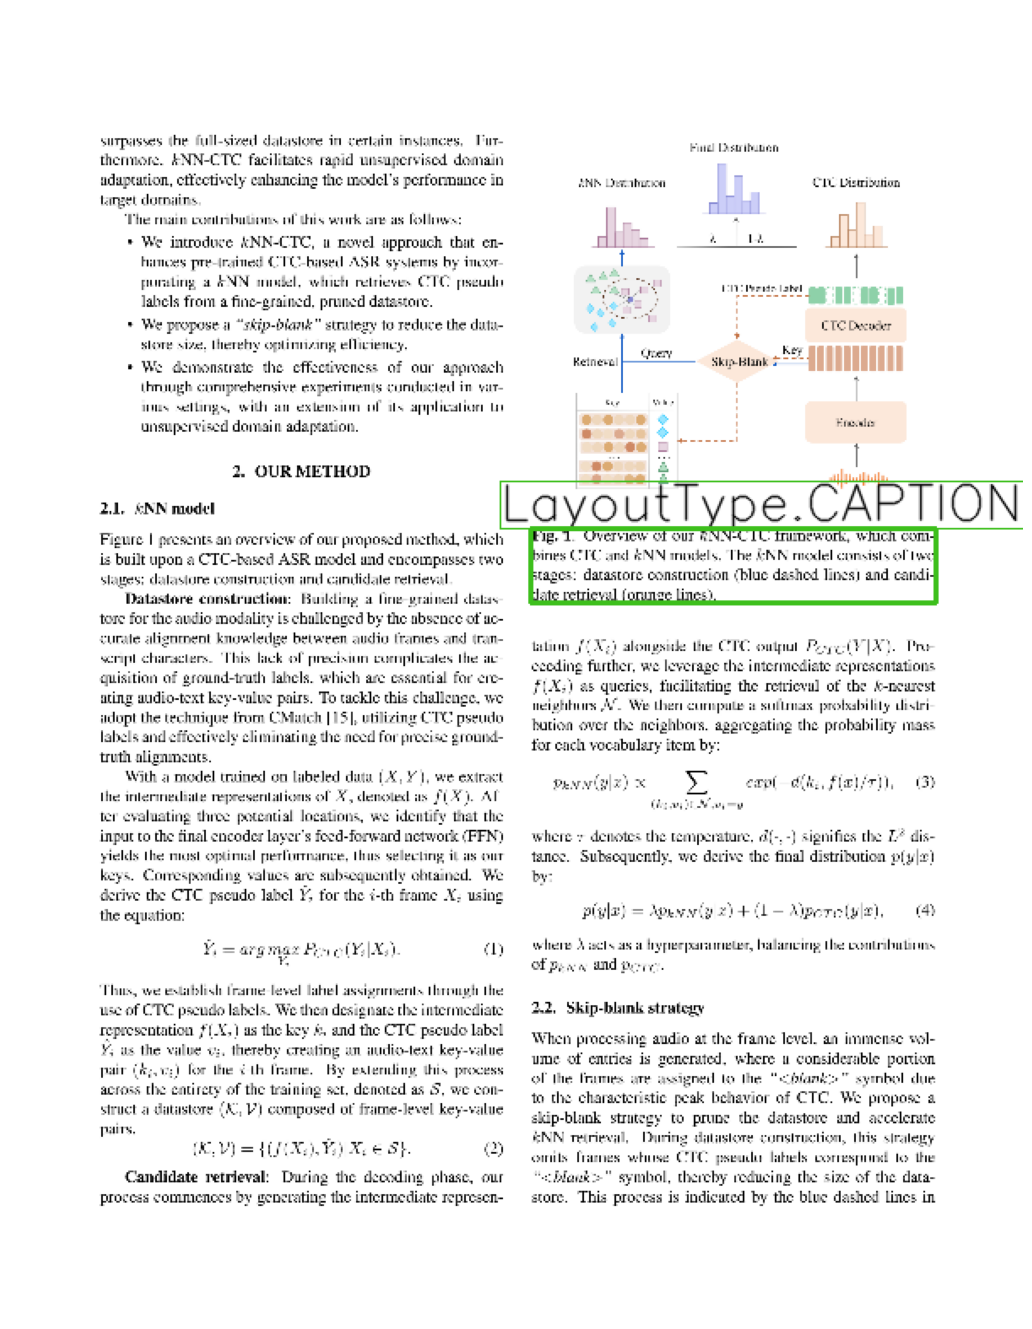

In [11]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(caption="category_name"))

Figure type layout segments have their own attributes: 

In [12]:
figure = page.figures[0]

`figure.viz()` returns a NumPy array containing the image segment enclosed by the bounding box.

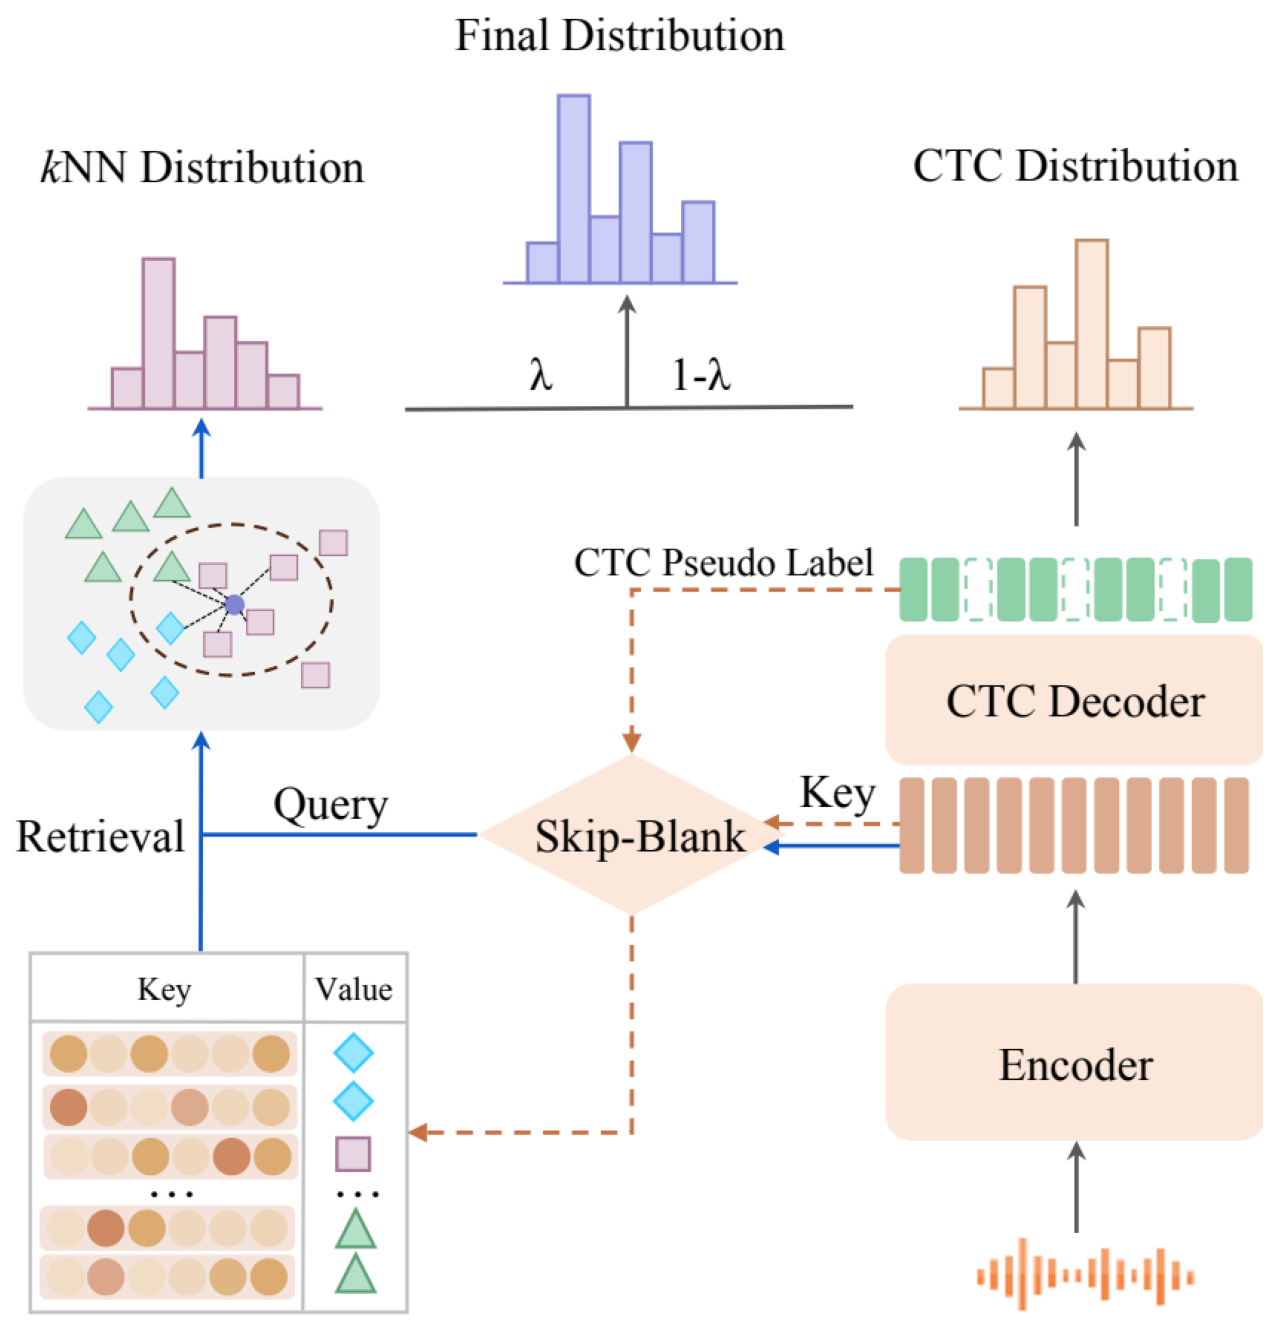

In [13]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(figure.viz())

This makes it easy to store layout sections under a unique ID.

In [14]:
dd.viz_handler.write_image(Path.cwd() /f"{figure.annotation_id}.png",figure.np_image)

Let’s return to our configuration. By setting `USE_LAYOUT_LINK=True`, we enabled a component that links `caption`s to `table`s or `figure`s. The linking is rule-based: if a `table` or `figure` is present, a `caption` is associated with the nearest one in terms of spatial proximity.

In [15]:
for caption in figure.layout_link:
    print(f"annotation_id: {caption.annotation_id}, text: {caption.text}")

annotation_id: 7883caee-82fe-30ca-a005-a6ef704d6e64, text: Fig. 1. Overview of our KNN-CTC framework, which com- bines CTC and KNN models. The KNN model consists of two stages: datastore construction (blue dashed lines) and candi- date retrieval (orange lines).


We conclude our tutorial with some special features. Suppose you have a specific layout segment. Using get_layout_context, you can retrieve the surrounding layout segments within a given context_size, i.e., the k layout segments that appear before and after it in the reading order.

In [16]:
for layout in page.get_layout_context(annotation_id='04a7b05b-165d-31eb-acf1-ab05269e34db',context_size=1):
    print("-----------------")
    print(f"annotation_id: {layout.annotation_id}, text: {layout.text}")

-----------------
annotation_id: 934fab57-6135-35e1-8f0b-b9319aa18176, text: 2.2. Skip-blank strategy
-----------------
annotation_id: 04a7b05b-165d-31eb-acf1-ab05269e34db, text: When processing audio at the frame level, an immense vol- ume of entries is generated, where a considerable portion of the frames are assigned to the "blank> " symbol due to the characteristic peak behavior of CTC. We propose a skip-blank strategy to prune the datastore and accelerate KNN retrieval. During datastore construction, this strategy omits frames whose CTC pseudo labels correspond to the "<blank>" symbol, thereby reducing the size of the data- store. This process is indicated by the blue dashed lines in


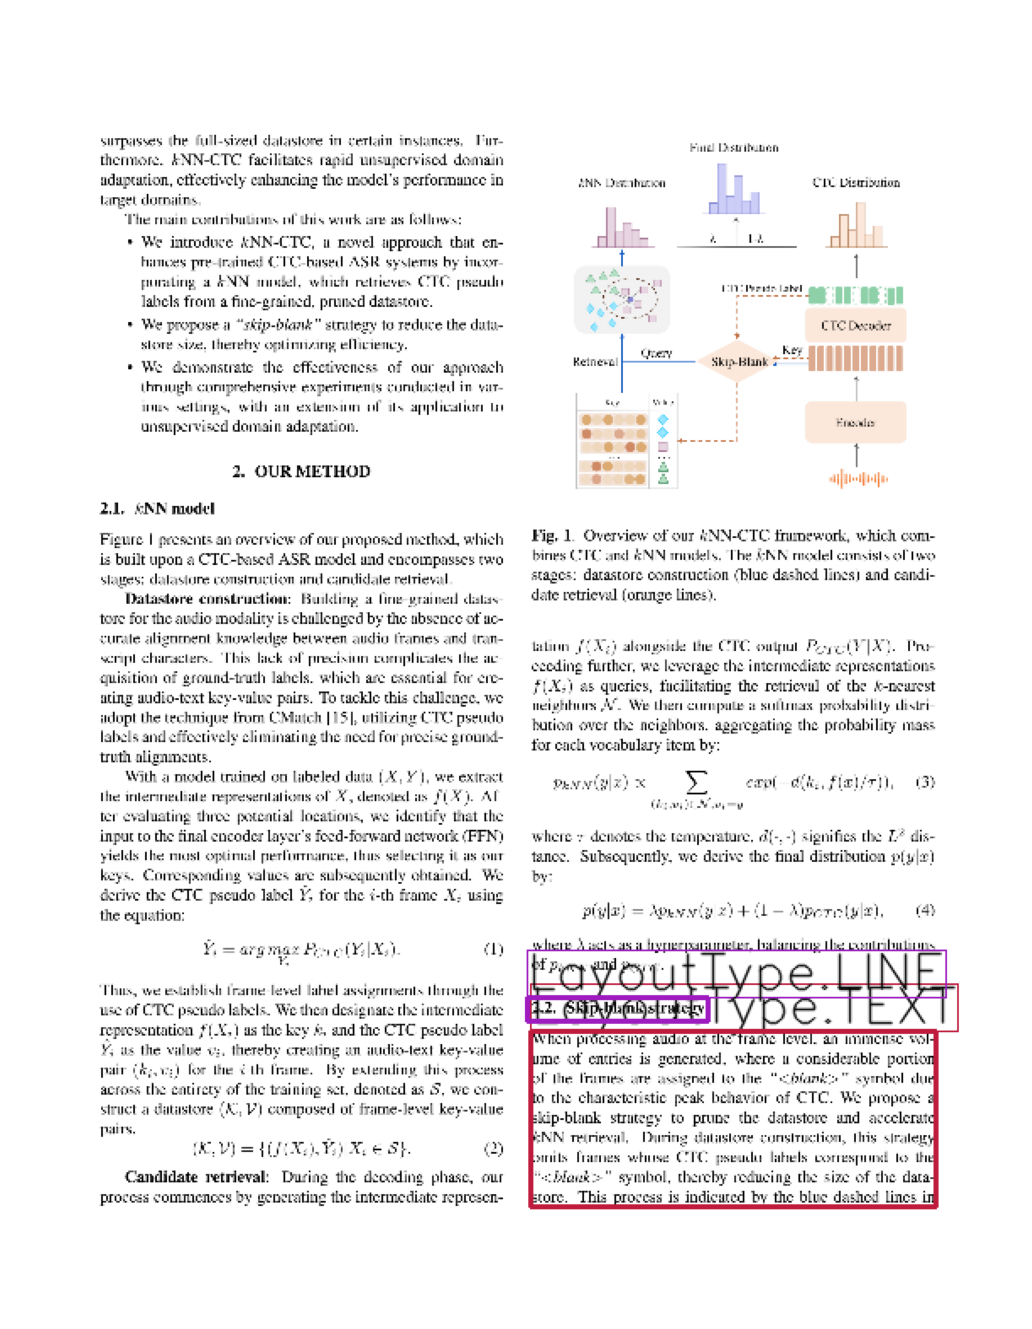

In [17]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(annotation_ids=['04a7b05b-165d-31eb-acf1-ab05269e34db','934fab57-6135-35e1-8f0b-b9319aa18176']))

Let's have another look at tables. 

In [20]:
for page in pages:
    print(f"Number of tables {len(page.tables)} in page_no {page.page_number}")

Number of tables 0 in page_no 0
Number of tables 0 in page_no 1
Number of tables 1 in page_no 2
Number of tables 3 in page_no 3
Number of tables 0 in page_no 4


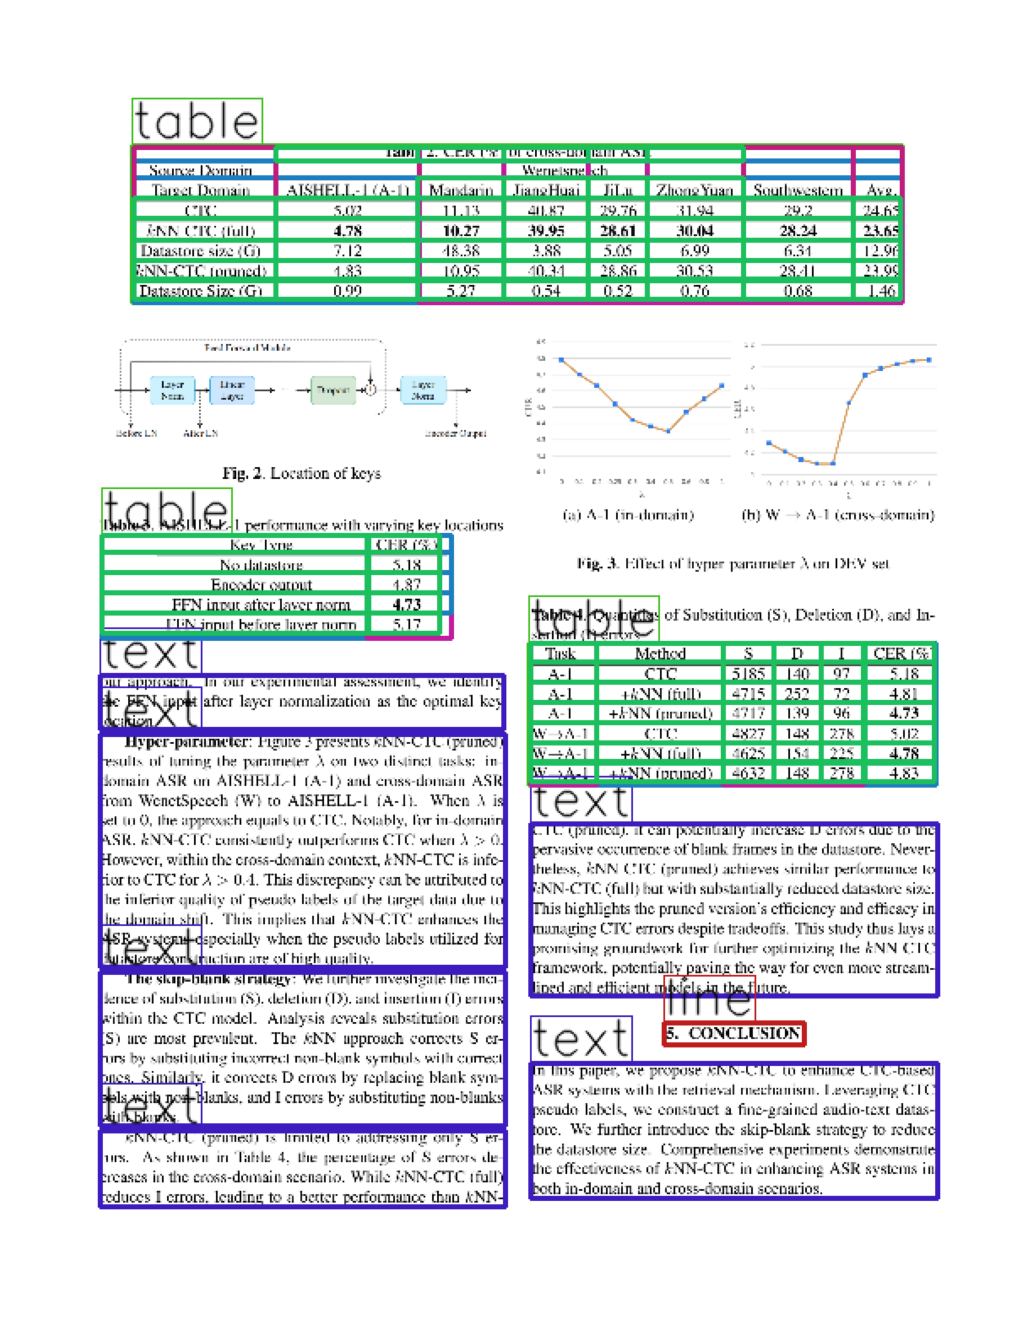

In [38]:
page = pages[3]

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz())

There are various ways to display the content of a table.

In [39]:
table = page.tables[0]

In [40]:
HTML(table.html)

In [41]:
table.csv # use this representation to load into Pandas Dataframe

[['Task ', 'Method ', 'S ', 'D ', 'I ', 'CER(%) '],
 ['A-1 ', 'CTC ', '5185 ', '140 ', '97 ', '5.18 '],
 ['A-1 ', '+KNN (full) ', '4715 ', '252 ', '72 ', '4.81 '],
 ['A-1 ', '+KNN (pruned) ', '4717 ', '139 ', '96 ', '4.73 '],
 ['W-A-1 ', 'CTC ', '4827 ', '148 ', '278 ', '5.02 '],
 ['W-A-1 ', '+KNN (full) ', '4625 ', '154 ', '225 ', '4.78 '],
 ['W-A-1 ', '+KNN (pruned) ', '4632 ', '148 ', '278 ', '4.83 ']]

In [42]:
table.number_of_rows, table.number_of_columns

(7, 6)

The next representation can be useful, if you want to pass a table to an LLM but want to git it the context of the column headers to each row. For each row you get a dictionary, where the key is a tuple `(column_number, column_header.text)` and the value is `cell.text` of the cell of position `(row_number,column_number)`.

**Note:** You will only get these results, if you choose the Table Transformer approach for table segmentation.

In [44]:
for row_num, _ in enumerate(range(table.number_of_rows+1)):
    print(table.kv_header_rows(row_num))

{}
{"(1, 'Task')": 'Task', "(2, 'Method')": 'Method', "(3, 'S')": 'S', "(4, 'D')": 'D', "(5, 'I')": 'I', "(6, 'CER(%)')": 'CER(%)'}
{"(1, 'Task')": 'A-1', "(2, 'Method')": 'CTC', "(3, 'S')": '5185', "(4, 'D')": '140', "(5, 'I')": '97', "(6, 'CER(%)')": '5.18'}
{"(1, 'Task')": 'A-1', "(2, 'Method')": '+KNN (full)', "(3, 'S')": '4715', "(4, 'D')": '252', "(5, 'I')": '72', "(6, 'CER(%)')": '4.81'}
{"(1, 'Task')": 'A-1', "(2, 'Method')": '+KNN (pruned)', "(3, 'S')": '4717', "(4, 'D')": '139', "(5, 'I')": '96', "(6, 'CER(%)')": '4.73'}
{"(1, 'Task')": 'W-A-1', "(2, 'Method')": 'CTC', "(3, 'S')": '4827', "(4, 'D')": '148', "(5, 'I')": '278', "(6, 'CER(%)')": '5.02'}
{"(1, 'Task')": 'W-A-1', "(2, 'Method')": '+KNN (full)', "(3, 'S')": '4625', "(4, 'D')": '154', "(5, 'I')": '225', "(6, 'CER(%)')": '4.78'}
{"(1, 'Task')": 'W-A-1', "(2, 'Method')": '+KNN (pruned)', "(3, 'S')": '4632', "(4, 'D')": '148', "(5, 'I')": '278', "(6, 'CER(%)')": '4.83'}


In [45]:
for column_header in table.column_header_cells:
    print(f"column_number: {column_header.column_number}, text: {column_header.text}")

column_number: 1, text: Task
column_number: 2, text: Method
column_number: 3, text: S
column_number: 4, text: D
column_number: 5, text: I
column_number: 6, text: CER(%)


You can also get the table row- or column- wise with `table.row(row_number)` or  `table.column(column_number)`. 